<a href="https://colab.research.google.com/github/melkatewabe10/Machine-learning_LST-Estimation-/blob/main/Graph_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Graph plots**

In [ ]:
!pip install rasterio

# RF performance plot

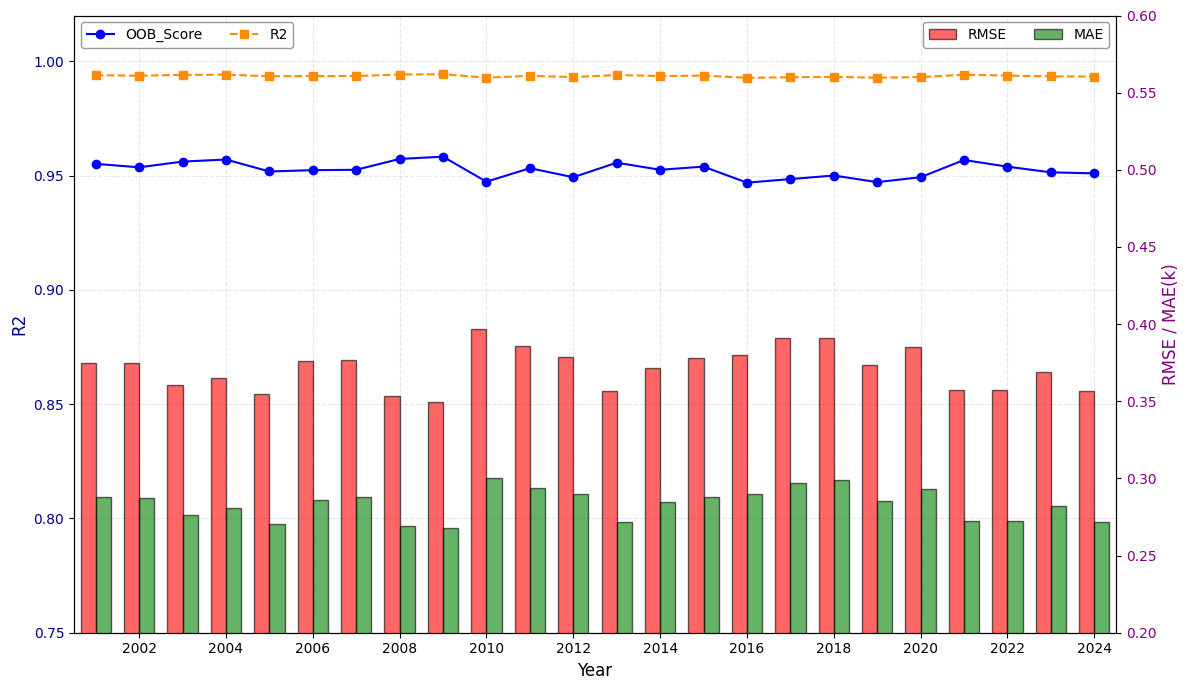

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # Import numpy for arange

# Define the file path to your CSV file
file_path = '/content/drive/MyDrive/NEW FOLDER/MODEL/Summary_grouped.csv'

try:
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Ensure 'Year' column is suitable for plotting (e.g., integer)
    # If 'Year' might contain non-numeric data, uncomment the following line
    # df['Year'] = pd.to_numeric(df['Year'], errors='coerce').dropna().astype(int)

    # Group the data by 'Year' and calculate the mean for each metric.
    # This aggregates multiple entries for the same year into a single representative value (the average).
    df_grouped = df.groupby('Year').mean().reset_index()

    # Sort by year to ensure the plot lines are correctly ordered
    df_grouped = df_grouped.sort_values(by='Year')

    # Create the figure and the first (left) y-axis
    fig, ax1 = plt.subplots(figsize=(12, 7)) # Adjusted figure size for better readability

    # --- Plotting on the Left Y-axis (OOB_Score and R2) ---
    # Plot OOB_Score
    line1, = ax1.plot(
        df_grouped['Year'],
        df_grouped['OOB_Score'],
        label='OOB_Score',
        marker='o',          # Circle marker
        linestyle='-',       # Solid line
        color='blue',        # Color for OOB_Score
        markersize=6
    )
    # Plot R2
    line2, = ax1.plot(
        df_grouped['Year'],
        df_grouped['R2'],
        label='R2',
        marker='s',          # Square marker
        linestyle='--',      # Dashed line
        color='darkorange',  # Color for R2
        markersize=6
    )

    # Set labels and color for the left y-axis
    ax1.set_xlabel('Year', fontsize=12)
    ax1.set_ylabel('R2', color='darkblue', fontsize=12)
    ax1.tick_params(axis='y', labelcolor='darkblue')

    # Set x-axis labels to be horizontal and set x-axis limits
    ax1.tick_params(axis='x', rotation=0) # Set rotation to 0 for horizontal labels
    ax1.set_xlim(2000.5, 2024.5) # Set x-axis limits from 2001 to 2024

    # Set x-axis ticks at 2-year intervals
    # Ensure all years from 2001 to 2024 are covered, stepping by 2
    ax1.set_xticks(np.arange(2002, 2025, 2)) # Start from 2002, go up to (but not including) 2025, step by 2


    # Set y-axis limits for OOB_Score and R2
    ax1.set_ylim(0.75, 1.02) # Changed from 0.7-1.09 to 0.75-1.03

    # Add a grid for better readability (dashed line with low alpha) for both x and y axes
    ax1.yaxis.grid(True, linestyle='--', alpha=0.3)
    ax1.xaxis.grid(True, linestyle='--', alpha=0.3) # Added x-axis grid

    # Set legend for OOB_Score and R2 in the upper left corner, horizontal layout
    ax1.legend(handles=[line1, line2], loc='upper left', ncol=2, fontsize=10, frameon=True, edgecolor='gray', facecolor='white')

    # --- Create a second y-axis (right side) sharing the same x-axis ---
    ax2 = ax1.twinx()

    # --- Plotting RMSE and MAE as column plot (bar plot) on the Right Y-axis ---
    bar_width = 0.35
    # Adjust x-coordinates for bars to be centered around the year
    r1 = df_grouped['Year'] - bar_width/2
    r2 = df_grouped['Year'] + bar_width/2

    bar1 = ax2.bar(
        r1,
        df_grouped['RMSE'],
        width=bar_width,
        label='RMSE',
        color='red',
        alpha=0.6,
        edgecolor='black'
    )
    bar2 = ax2.bar(
        r2,
        df_grouped['MAE'],
        width=bar_width,
        label='MAE',
        color='green',
        alpha=0.6,
        edgecolor='black'
    )

    # Set labels and color for the right y-axis
    ax2.set_ylabel('RMSE / MAE(k)', color='purple', fontsize=12)
    ax2.tick_params(axis='y', labelcolor='purple')

    # Set y-axis limits for RMSE and MAE
    ax2.set_ylim(0.2, 0.6)

    # Disable grid for the right side (as requested, only left side has grid)
    ax2.grid(False)

    # Set legend for RMSE and MAE in the upper right corner, horizontal layout
    ax2.legend(handles=[bar1, bar2], loc='upper right', ncol=2, fontsize=10, frameon=True, edgecolor='gray', facecolor='white')

    # # Set the title of the plot
    # plt.title('Performance Metrics Over Years', fontsize=14, fontweight='bold')

    # Adjust layout to prevent labels/titles from overlapping
    fig.tight_layout()

    # Save the figure with high resolution
    # You can change the filename and format (e.g., 'plot.png', 'plot.svg', 'plot.pdf')

    plt.savefig('performance_metrics_plot.png', dpi=300, bbox_inches='tight')

    # Display the plot
    plt.show()

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the path.")
except KeyError as e:
    print(f"Error: Missing expected column in the CSV file: {e}. Please ensure 'Year', 'OOB_Score', 'R2', 'RMSE', and 'MAE' columns exist.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


# Importance

In [ ]:
import pandas as pd
import os

# Define the directory path
data_dir = '/content/drive/MyDrive/NEW FOLDER/MODEL'

# Initialize an empty list to store DataFrames
dfs = []

# Loop through years (2001 to 2024) and seasons (01 to 04)
for year in range(2001, 2025):
    for season in ['01', '02', '03', '04']:
        # Construct the file name
        file_name = f'Importance_{year}_{season}.csv'
        file_path = os.path.join(data_dir, file_name)

        # Check if the file exists
        if os.path.exists(file_path):
            try:
                # Read the CSV file
                df = pd.read_csv(file_path)
                # Add year and season columns
                df['year'] = year
                df['season'] = season
                # Append to the list of DataFrames
                dfs.append(df)
                print(f'Successfully loaded {file_name}')
            except Exception as e:
                print(f'Error reading {file_name}: {e}')
        else:
            print(f'File {file_name} does not exist')

# Concatenate all DataFrames vertically
if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)
    # Reorder columns to have year and season first
    cols = ['year', 'season'] + [col for col in combined_df.columns if col not in ['year', 'season']]
    combined_df = combined_df[cols]
    # Display the first few rows
    print("\nCombined DataFrame:")
    print(combined_df.head())
    # Save the combined DataFrame to a new CSV file (optional)
    output_path = os.path.join(data_dir, 'Combined_Importance.csv')
    combined_df.to_csv(output_path, index=False)
    print(f'\nCombined data saved to {output_path}')
else:
    print('No DataFrames to concatenate')

# importance plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the DataFrame from the specified CSV file
# Ensure the CSV file has columns named 'Feature', 'Importance_mean', and 'Importance_Std'
try:
    df = pd.read_csv('/content/drive/MyDrive/NEW FOLDER/MODEL/grouped_Importance.csv')
except FileNotFoundError:
    print("Error: The file 'grouped_Importance.csv' was not found at the specified path.")
    print("Please ensure the file exists and the path is correct.")
    # Fallback to dummy data for demonstration if file not found
    data = {
        'Feature': ['ELV', 'ALB', 'SLP', 'NDVI', 'NDWI', 'DSR', 'EVI', 'LAI'],
        'Importance_mean': [0.509673347, 0.194942272, 0.086230402, 0.058327661,
                            0.046760615, 0.040268895, 0.034031922, 0.029764885],
        'Importance_Std': [0.032736605, 0.020087012, 0.010161009, 0.015237471,
                           0.017531337, 0.024195459, 0.009531188, 0.009292742]
    }
    df = pd.DataFrame(data)
    print("Using dummy data for plotting as a fallback.")

# Sort the DataFrame by 'Importance_mean' in descending order for vertical bars
# This ensures the highest importance feature appears first on the left
df = df.sort_values(by='Importance_mean', ascending=False)

# Create the vertical column plot with error bars
# Reduced figure size from (10, 6) to (8, 5)
plt.figure(figsize=(8, 5)) # Adjust figure size to reduce overall plot size
plt.bar(df['Feature'], # X-axis: Features
        df['Importance_mean'], # Bar height: Importance mean
        yerr=df['Importance_Std'], # Y-error bars: Importance standard deviation
        capsize=5, # Cap size for error bars
        color='lightgray', # Bar color set to gray
        ecolor='red', # Error bar color set to red
        edgecolor='black') # Border color for bars

# Add titles and labels
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance', fontsize=12)
# plt.title('Feature Importance with Standard Deviation', fontsize=14)

# Set x-axis labels to be horizontal (rotation=0)
plt.xticks(rotation=0, ha='center') # Changed rotation from 45 to 0 and ha from 'right' to 'center'

# Set y-axis limits to remove extra space at the bottom and top of the importance values
# Start from 0 and extend slightly beyond the max importance
plt.ylim(0, df['Importance_mean'].max() * 1.1)

# Add a grid for better readability (now on y-axis)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adjust layout to prevent labels from being cut off
plt.tight_layout()

# Display the plot
plt.show()



# TEMP mean group

In [ ]:
import pandas as pd
import os
import re # Import regex module for extracting season number

# Define the directory where your files are located
# This path assumes you are running this in a Google Colab environment or similar
# where your Google Drive is mounted at /content/drive
data_directory = '/content/drive/MyDrive/NEW FOLDER/STAT'

# List of the CSV files you want to process
file_names = [
    'TEMP_data_01.csv',
    'TEMP_data_02.csv',
    'TEMP_data_03.csv',
    'TEMP_data_04.csv'
]

# Create an empty list to store yearly mean DataFrames for each season
yearly_mean_dfs = []

print(f"Starting to process files from: {data_directory}")


# Loop through each file, read it, and process for yearly mean
for file_name in file_names:
    file_path = os.path.join(data_directory, file_name)
    try:
        # Read the CSV file into a pandas DataFrame
        # Assuming the files do not have a header row and columns are in order: year, Tc, Tso, Ta
        df = pd.read_csv(file_path, header=None, names=['year', 'swati', 'tvpdi', 'prep'])

        # Convert the columns to numeric, coercing errors to NaN
        # This handles cases where there might be non-numeric values in these columns
        df['Tc'] = pd.to_numeric(df['Tc'], errors='coerce')
        df['Tso'] = pd.to_numeric(df['Tso'], errors='coerce')
        df['Ta'] = pd.to_numeric(df['Ta'], errors='coerce')

        # Extract the season number from the file name (e.g., '01' from 'TEMP_data_01.csv')
        # Using regex to find the digits after 'data_' and before '.csv'
        season_match = re.search(r'data_(\d+)\.csv', file_name)
        if season_match:
            season_number = season_match.group(1)
        else:
            print(f"Warning: Could not extract season number from {file_name}. Skipping.")
            continue

        # Define the columns for which to calculate mean
        columns_to_analyze = ['Tc', 'Tso', 'Ta']

        # Group by 'year' and calculate mean for specified columns
        current_season_yearly_mean = df.groupby('year')[columns_to_analyze].mean()

        # Rename columns to include the season number
        # Example: 'Tc' becomes 'Tc_01_mean', 'Tso' becomes 'Tso_01_mean', etc.
        renamed_columns = {col: f'{col}_{season_number}_mean' for col in columns_to_analyze}
        current_season_yearly_mean = current_season_yearly_mean.rename(columns=renamed_columns)

        # Reset index to make 'year' a column again, which is necessary for merging later
        current_season_yearly_mean = current_season_yearly_mean.reset_index()

        yearly_mean_dfs.append(current_season_yearly_mean)
        print(f"Successfully processed {file_name} for yearly mean.")

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}. Please check the path and file name.")
    except Exception as e:
        print(f"An error occurred while reading or processing {file_name}: {e}")

# Check if any data was loaded
if not yearly_mean_dfs:
    print("No yearly mean data frames were loaded. Exiting.")
else:
    # Merge all yearly mean DataFrames based on the 'year' column
    # The first DataFrame is used as the base, and subsequent ones are merged
    # Outer join ensures all years from all seasons are included
    combined_yearly_mean_df = yearly_mean_dfs[0]
    for i in range(1, len(yearly_mean_dfs)):
        combined_yearly_mean_df = pd.merge(combined_yearly_mean_df, yearly_mean_dfs[i], on='year', how='outer')

    print("\nAll yearly mean data combined successfully with season-specific columns.")
    print("Combined Yearly Mean DataFrame head:")
    print(combined_yearly_mean_df.head())

    # Define the output file path
    output_file_name = 'yearly_mean_by_season.csv'
    output_file_path = os.path.join(data_directory, output_file_name)

    # Save the combined statistics to a new CSV file
    try:
        combined_yearly_mean_df.to_csv(output_file_path, index=False) # index=False prevents pandas from writing the DataFrame index as a column
        print(f"\nYearly mean statistics by season saved successfully to: {output_file_path}")
    except Exception as e:
        print(f"An error occurred while saving the file: {e}")


Starting to process files from: /content/drive/MyDrive/NEW FOLDER/STAT


/tmp/ipython-input-4-3613646597.py:29: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, names=['year', 'Tc', 'Tso', 'Ta'])


Successfully processed TEMP_data_01.csv for yearly mean.


/tmp/ipython-input-4-3613646597.py:29: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, names=['year', 'Tc', 'Tso', 'Ta'])


Successfully processed TEMP_data_02.csv for yearly mean.


/tmp/ipython-input-4-3613646597.py:29: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, names=['year', 'Tc', 'Tso', 'Ta'])


Successfully processed TEMP_data_03.csv for yearly mean.


/tmp/ipython-input-4-3613646597.py:29: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, names=['year', 'Tc', 'Tso', 'Ta'])


Successfully processed TEMP_data_04.csv for yearly mean.

All yearly mean data combined successfully with season-specific columns.
Combined Yearly Mean DataFrame head:
   year  Tc_01_mean  Tso_01_mean  Ta_01_mean  Tc_02_mean  Tso_02_mean  \
0  2005  293.518502   292.236576  286.914773  297.891746   297.001839   
1  2006  293.378938   292.400394  287.096478  298.372588   297.486147   
2  2007  293.198247   292.039173  287.462399  299.186126   298.032145   
3  2008  293.133733   292.667521  286.914475  297.941150   296.999487   
4  2009  293.939157   292.633696  287.176666  298.824844   297.953704   

   Ta_02_mean  Tc_03_mean  Tso_03_mean  Ta_03_mean  Tc_04_mean  Tso_04_mean  \
0  291.385160  300.320251   300.050819  296.043701  298.238633   297.948450   
1  292.020473  301.174097   300.401657  296.330482  297.863641   297.173326   
2  291.793631  301.424343   300.808835  296.477625  297.309109   296.693093   
3  291.632920  300.856411   300.145518  296.142922  298.370171   297.605451  

# Temp mean plot

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt # Import matplotlib for plotting
import numpy as np # Import numpy for arange

# Define the directory where your file is located
data_directory = '/content/drive/MyDrive/NEW FOLDER/STAT'

# Define the name of the pre-arranged mean file
# This assumes you have a file named 'Temp_mean_by_season.csv' with mean data
input_mean_file_name = 'Temp_mean_by_season.csv' # Changed from _std_ to _mean_
input_mean_file_path = os.path.join(data_directory, input_mean_file_name)

print(f"Attempting to load data from: {input_mean_file_path}")

try:
    # Load the pre-arranged mean data
    # Assuming this file already has 'year' and season-specific mean columns (e.g., 'Tc_01_mean')
    combined_yearly_mean_df = pd.read_csv(input_mean_file_path) # Changed DataFrame name
    print("File loaded successfully. DataFrame head:")
    print(combined_yearly_mean_df.head())

except FileNotFoundError:
    print(f"Error: Input file not found at {input_mean_file_path}.")
    print("Please ensure the file 'Temp_mean_by_season.csv' exists in the specified directory.")
    exit() # Exit if the file is not found
except Exception as e:
    print(f"An error occurred while loading the file: {e}")
    exit() # Exit on other loading errors

# --- PLOTTING CODE ---
print("\nGenerating plots for mean by season...")

# Define season labels and their corresponding numerical suffixes
season_info = {
    '01': 'DJF',
    '02': 'MAM',
    '03': 'JJA',
    '04': 'SON'
}

# Define prefixes for subplot labels (a), b), c), d))
subplot_prefixes = ['a)', 'b)', 'c)', 'd)']

# Define consistent colors and line styles for each variable (Tc, Tso, Ta)
plot_styles = {
    'Tc': {'color': 'red', 'marker': 'o', 'linestyle': '-', 'label': 'Tc'},
    'Tso': {'color': 'blue', 'marker': 'o', 'linestyle': '-', 'label': 'Tso'},
    'Ta': {'color': 'green', 'marker': 'o', 'linestyle': '--', 'label': 'Ta'} # Dashed line for Ta
}

# Create a 2x2 subplot grid for the plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten() # Flatten the 2x2 array of axes for easy iteration

# Define y-axis limits and interval as requested
y_min = 285
y_max = 305 # Changed from 3045 to 305 assuming a typo as 3045 is very large for temperature in K
y_interval = 5
y_ticks = np.arange(y_min, y_max + y_interval, y_interval) # Generate ticks with specified interval

# Iterate through each season to create a subplot
for i, (season_num, season_label_short) in enumerate(season_info.items()):
    ax = axes[i] # Get the current subplot axis

    # Construct the column names for mean for the current season
    cols_to_plot_info = {
        'Tc': f'Tc_{season_num}_mean',
        'Tso': f'Tso_{season_num}_mean',
        'Ta': f'Ta_{season_num}_mean'
    }

    # Plot each variable's mean for the current season
    for var_name, col_name in cols_to_plot_info.items():
        if col_name in combined_yearly_mean_df.columns:
            style = plot_styles[var_name]
            ax.plot(combined_yearly_mean_df['year'], combined_yearly_mean_df[col_name],
                    label=style['label'], color=style['color'],
                    marker=style['marker'], markersize=4, linestyle=style['linestyle'])
        else:
            print(f"Warning: Column '{col_name}' not found in the DataFrame for plotting. Skipping this variable for {season_label_short}.")

    # Set labels and grid for the current subplot
    ax.set_xlabel('Year', fontsize=12) # Increased font size for x-axis label
    ax.set_ylabel('Temprature (K)', fontsize=12) # Changed y-axis label to 'Mean (K)'
    ax.tick_params(axis='both', which='major', labelsize=11) # Keep tick labels slightly smaller than axis labels

    # Set the y-axis limits and ticks as requested
    ax.set_ylim(y_min, y_max)
    ax.set_yticks(y_ticks)

    # Set the x-axis limits from 2001 to 2024 for all subplots
    ax.set_xlim(2001, 2024)

    ax.grid(True, linestyle='--', alpha=0.3)

    # Add the season label to the upper-left corner of each subplot
    full_season_label = f"{subplot_prefixes[i]} {season_label_short}"
    ax.text(0.05, 0.95, full_season_label, transform=ax.transAxes, fontsize=12, # Increased font size for season label
            verticalalignment='top', horizontalalignment='left')
            # bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.6, ec='gray'))

    # Add the horizontal legend only to the first subplot (upper-right corner)
    if i == 0:
        handles = [plt.Line2D([0], [0], color=plot_styles['Tc']['color'], marker=plot_styles['Tc']['marker'], linestyle=plot_styles['Tc']['linestyle'], label=plot_styles['Tc']['label']),
                   plt.Line2D([0], [0], color=plot_styles['Tso']['color'], marker=plot_styles['Tso']['marker'], linestyle=plot_styles['Tso']['linestyle'], label=plot_styles['Tso']['label']),
                   plt.Line2D([0], [0], color=plot_styles['Ta']['color'], marker=plot_styles['Ta']['marker'], linestyle=plot_styles['Ta']['linestyle'], label=plot_styles['Ta']['label'])]
        ax.legend(handles=handles, loc='upper right', bbox_to_anchor=(1, 1), ncol=len(plot_styles), frameon=True, fontsize=11) # Increased font size for legend

# Adjust layout to prevent overlapping elements and reduce horizontal spacing
plt.tight_layout()
plt.subplots_adjust(wspace=0.13) # Reduced horizontal space further

# Define the output file path for saving the plot
output_plot_file_name = 'TEMP_mean_by_season.png'
output_plot_file_path = os.path.join(data_directory, output_plot_file_name)

# Save the generated plot with high resolution (e.g., dpi=300)
try:
    plt.savefig(output_plot_file_path, dpi=300) # Increased dpi for higher resolution
    print(f"\nPlot saved successfully to: {output_plot_file_path}")
    print(f"The plot is saved with high resolution (300 dpi).")
except Exception as e:
    print(f"An error occurred while saving the plot: {e}")

plt.show() # Display the plot


# Temp std group

In [ ]:
import pandas as pd
import os
import re # Import regex module for extracting season number

# Define the directory where your files are located
# This path assumes you are running this in a Google Colab environment or similar
# where your Google Drive is mounted at /content/drive
data_directory = '/content/drive/MyDrive/NEW FOLDER/STAT'

# List of the CSV files you want to process
file_names = [
    'TEMP_data_01.csv',
    'TEMP_data_02.csv',
    'TEMP_data_03.csv',
    'TEMP_data_04.csv'
]

# Create an empty list to store yearly standard deviation DataFrames for each season
yearly_std_dfs = []

print(f"Starting to process files from: {data_directory}")

# Loop through each file, read it, and process for yearly standard deviation
for file_name in file_names:
    file_path = os.path.join(data_directory, file_name)
    try:
        # Read the CSV file into a pandas DataFrame
        # Assuming the files do not have a header row and columns are in order: year, Tc, Tso, Ta
        df = pd.read_csv(file_path, header=None, names=['year', 'Tc', 'Tso', 'Ta'])

        # Convert the columns to numeric, coercing errors to NaN
        # This handles cases where there might be non-numeric values in these columns
        df['Tc'] = pd.to_numeric(df['Tc'], errors='coerce')
        df['Tso'] = pd.to_numeric(df['Tso'], errors='coerce')
        df['Ta'] = pd.to_numeric(df['Ta'], errors='coerce')

        # Extract the season number from the file name (e.g., '01' from 'TEMP_data_01.csv')
        # Using regex to find the digits after 'data_' and before '.csv'
        season_match = re.search(r'data_(\d+)\.csv', file_name)
        if season_match:
            season_number = season_match.group(1)
        else:
            print(f"Warning: Could not extract season number from {file_name}. Skipping.")
            continue

        # Define the columns for which to calculate standard deviation
        columns_to_analyze = ['Tc', 'Tso', 'Ta']

        # Group by 'year' and calculate standard deviation for specified columns
        current_season_yearly_std = df.groupby('year')[columns_to_analyze].std()

        # Rename columns to include the season number
        # Example: 'Tc' becomes 'Tc_01_std', 'Tso' becomes 'Tso_01_std', etc.
        renamed_columns = {col: f'{col}_{season_number}_std' for col in columns_to_analyze}
        current_season_yearly_std = current_season_yearly_std.rename(columns=renamed_columns)

        # Reset index to make 'year' a column again, which is necessary for merging later
        current_season_yearly_std = current_season_yearly_std.reset_index()

        yearly_std_dfs.append(current_season_yearly_std)
        print(f"Successfully processed {file_name} for yearly standard deviation.")

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}. Please check the path and file name.")
    except Exception as e:
        print(f"An error occurred while reading or processing {file_name}: {e}")

# Check if any data was loaded
if not yearly_std_dfs:
    print("No yearly standard deviation data frames were loaded. Exiting.")
else:
    # Merge all yearly standard deviation DataFrames based on the 'year' column
    # The first DataFrame is used as the base, and subsequent ones are merged
    # Outer join ensures all years from all seasons are included
    combined_yearly_std_df = yearly_std_dfs[0]
    for i in range(1, len(yearly_std_dfs)):
        combined_yearly_std_df = pd.merge(combined_yearly_std_df, yearly_std_dfs[i], on='year', how='outer')

    print("\nAll yearly standard deviation data combined successfully with season-specific columns.")
    print("Combined Yearly Standard Deviation DataFrame head:")
    print(combined_yearly_std_df.head())

    # Define the output file path
    output_file_name = 'yearly_std_by_season.csv'
    output_file_path = os.path.join(data_directory, output_file_name)

    # Save the combined statistics to a new CSV file
    try:
        combined_yearly_std_df.to_csv(output_file_path, index=False) # index=False prevents pandas from writing the DataFrame index as a column
        print(f"\nYearly standard deviation statistics by season saved successfully to: {output_file_path}")
    except Exception as e:
        print(f"An error occurred while saving the file: {e}")


# Temp std plot

Attempting to load data from: /content/drive/MyDrive/NEW FOLDER/STAT/Temp_std_by_season.csv
File loaded successfully. DataFrame head:
   year  Tc_01_std  Tso_01_std  Ta_01_std  Tc_02_std  Tso_02_std  Ta_02_std  \
0  2001   2.304488    4.659828   4.154529   1.726421    4.969213   4.307936   
1  2002   1.792741    4.663213   4.236664   2.000175    4.727089   4.369848   
2  2003   1.332502    4.650745   4.415088   1.578464    4.673348   4.318597   
3  2004   1.863093    5.008110   4.240589   1.737922    4.720291   4.211795   
4  2005   1.520821    4.801425   4.385778   1.550643    4.693535   4.575045   

   Tc_03_std  Tso_03_std  Ta_03_std  Tc_04_std  Tso_04_std  Ta_04_std  
0   1.528859    5.002122   4.674418   2.127309    4.577772   4.327198  
1   1.657527    4.363572   4.668251   1.836258    5.206487   4.623381  
2   2.118789    4.693846   4.657266   1.644009    4.703044   4.546056  
3   1.413063    4.732137   4.704132   2.218393    4.794347   4.560340  
4   1.358525    4.625653   4.71

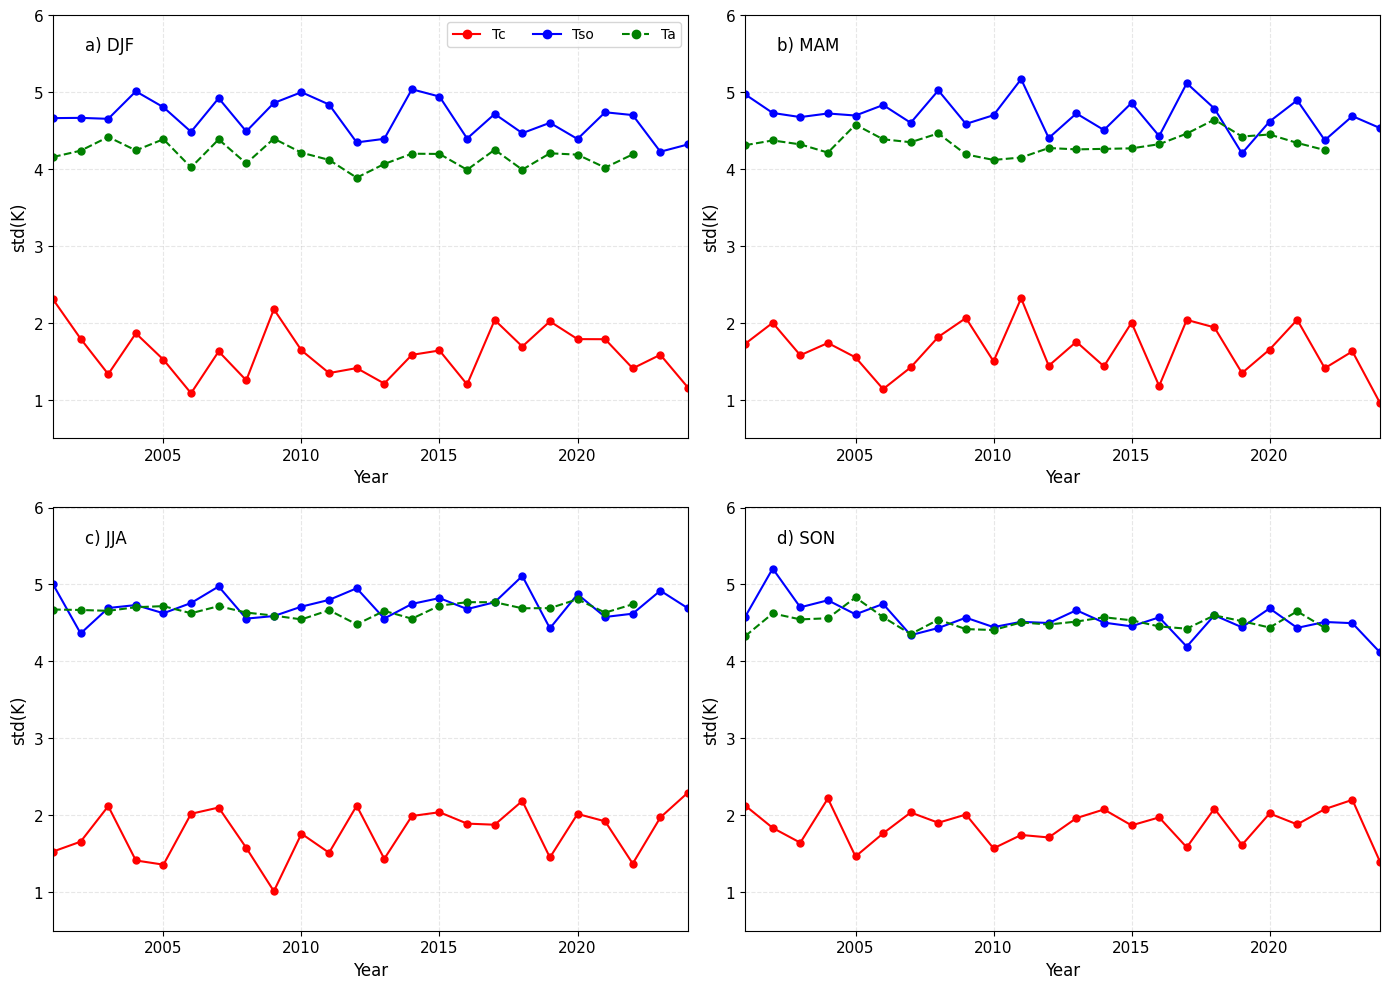

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt # Import matplotlib for plotting

# Define the directory where your file is located
data_directory = '/content/drive/MyDrive/NEW FOLDER/STAT'

# Define the name of the pre-arranged standard deviation file
input_std_file_name = 'Temp_std_by_season.csv'
input_std_file_path = os.path.join(data_directory, input_std_file_name)

print(f"Attempting to load data from: {input_std_file_path}")

try:
    # Load the pre-arranged standard deviation data
    # Assuming this file already has 'year' and season-specific std columns (e.g., 'Tc_01_std')
    combined_yearly_std_df = pd.read_csv(input_std_file_path)
    print("File loaded successfully. DataFrame head:")
    print(combined_yearly_std_df.head())

except FileNotFoundError:
    print(f"Error: Input file not found at {input_std_file_path}.")
    print("Please ensure the file 'Temp_std_by_season.csv' exists in the specified directory.")
    exit() # Exit if the file is not found
except Exception as e:
    print(f"An error occurred while loading the file: {e}")
    exit() # Exit on other loading errors

# --- PLOTTING CODE ---
print("\nGenerating plots for standard deviation by season...")

# Define season labels and their corresponding numerical suffixes with new formatting
season_info = {
    '01': 'DJF',
    '02': 'MAM',
    '03': 'JJA',
    '04': 'SON'
}

# Define prefixes for subplot labels (a), b), c), d))
subplot_prefixes = ['a)', 'b)', 'c)', 'd)']

# Define consistent colors and line styles for each variable (Tc, Tso, Ta)
plot_styles = {
    'Tc': {'color': 'red', 'marker': 'o', 'linestyle': '-', 'label': 'Tc'},
    'Tso': {'color': 'blue', 'marker': 'o', 'linestyle': '-', 'label': 'Tso'},
    'Ta': {'color': 'green', 'marker': 'o', 'linestyle': '--', 'label': 'Ta'} # Dashed line for Ta
}

# Create a 2x2 subplot grid for the plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten() # Flatten the 2x2 array of axes for easy iteration

# Iterate through each season to create a subplot
for i, (season_num, season_label_short) in enumerate(season_info.items()):
    ax = axes[i] # Get the current subplot axis

    # Construct the column names for standard deviation for the current season
    # We are assuming column names like 'Tc_01_std', 'Tso_01_std', 'Ta_01_std'
    cols_to_plot_info = {
        'Tc': f'Tc_{season_num}_std',
        'Tso': f'Tso_{season_num}_std',
        'Ta': f'Ta_{season_num}_std'
    }

    # Plot each variable's standard deviation for the current season
    for var_name, col_name in cols_to_plot_info.items():
        if col_name in combined_yearly_std_df.columns:
            style = plot_styles[var_name]
            ax.plot(combined_yearly_std_df['year'], combined_yearly_std_df[col_name],
                    label=style['label'], color=style['color'],
                    marker=style['marker'], markersize=5, linestyle=style['linestyle'])
        else:
            print(f"Warning: Column '{col_name}' not found in the DataFrame for plotting. Skipping this variable for {season_label_short}.")

    # Set labels and grid for the current subplot
    # ax.set_xlabel('Year')
    # ax.set_ylabel('std(K)') # Y-axis label as requested
    # # Set labels and grid for the current subplot
    ax.set_xlabel('Year', fontsize=12) # Increased font size for x-axis label
    ax.set_ylabel('std(K)', fontsize=12) # Increased font size for y-axis label
    ax.tick_params(axis='both', which='major', labelsize=11) # Keep tick labels slightly smaller than axis labels

    # Set the y-axis limits from 0.5 to 6 for all subplots
    ax.set_ylim(0.5, 6)
    # Set the x-axis limits from 2001 to 2024 for all subplots
    ax.set_xlim(2001, 2024)

    ax.grid(True, linestyle='--', alpha=0.3)

    # Add the season label to the upper-left corner of each subplot
    # Now includes the (a), (b), etc. prefix
    full_season_label = f"{subplot_prefixes[i]} {season_label_short}"
    ax.text(0.05, 0.95, full_season_label, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', horizontalalignment='left')

            # bbox=dict(boxstyle='round,pad=0.4', fc='white', alpha=0.2, ec='gray'))

    # Add the horizontal legend only to the first subplot (upper-right corner)
    if i == 0:
        # Create handles for the legend explicitly to ensure correct labels with new plotting logic
        handles = [plt.Line2D([0], [0], color=plot_styles['Tc']['color'], marker=plot_styles['Tc']['marker'], linestyle=plot_styles['Tc']['linestyle'], label=plot_styles['Tc']['label']),
                   plt.Line2D([0], [0], color=plot_styles['Tso']['color'], marker=plot_styles['Tso']['marker'], linestyle=plot_styles['Tso']['linestyle'], label=plot_styles['Tso']['label']),
                   plt.Line2D([0], [0], color=plot_styles['Ta']['color'], marker=plot_styles['Ta']['marker'], linestyle=plot_styles['Ta']['linestyle'], label=plot_styles['Ta']['label'])]
        ax.legend(handles=handles, loc='upper right', bbox_to_anchor=(1, 1), ncol=len(plot_styles), frameon=True)

# Adjust layout to prevent overlapping elements and reduce horizontal spacing
plt.tight_layout()
# Reduce horizontal space significantly
plt.subplots_adjust(wspace=0.09) # Reduced horizontal space further

# Define the output file path for saving the plot
output_plot_file_name = 'Temp_std_by_season_plot.png'
output_plot_file_path = os.path.join(data_directory, output_plot_file_name)

# Save the generated plot with high resolution (e.g., dpi=300)
try:
    # plt.savefig(output_plot_file_path, dpi=300) # Increased dpi for higher resolution
    print(f"\nPlot saved successfully to: {output_plot_file_path}")
    print(f"The plot is saved with high resolution (300 dpi).")
except Exception as e:
    print(f"An error occurred while saving the plot: {e}")

plt.show() # Display the plot


# Indexes calculations mean

In [ ]:
import pandas as pd
import os
import re # Import regex module for extracting season number

# Define the directory where your files are located
# This path assumes you are running this in a Google Colab environment or similar
# where your Google Drive is mounted at /content/drive
data_directory = '/content/drive/MyDrive/NEW FOLDER/STAT'

# List of the CSV files you want to process
file_names = [
    'All_indices_data_01.csv',
    'All_indices_data_02.csv',
    'All_indices_data_03.csv',
    'All_indices_data_04.csv'
]

# Create an empty list to store yearly mean DataFrames for each season
yearly_mean_dfs = []

print(f"Starting to process files from: {data_directory}")

# Loop through each file, read it, and process for yearly mean
for file_name in file_names:
    file_path = os.path.join(data_directory, file_name)
    try:
        # Read the CSV file into a pandas DataFrame
        # Assuming the files do not have a header row and columns are in order: year, swati, tvpdic, tvpdi, cdd, prep
        df = pd.read_csv(file_path, header=None, names=['year', 'swati', 'tvpdic', 'tvpdi', 'cdd', 'prep'])

        # Convert the columns to numeric, coercing errors to NaN
        # This handles cases where there might be non-numeric values in these columns
        df['swati'] = pd.to_numeric(df['swati'], errors='coerce')
        df['tvpdic'] = pd.to_numeric(df['tvpdic'], errors='coerce')
        df['tvpdi'] = pd.to_numeric(df['tvpdi'], errors='coerce')
        df['cdd'] = pd.to_numeric(df['cdd'], errors='coerce')
        df['prep'] = pd.to_numeric(df['prep'], errors='coerce')

        # Extract the season number from the file name (e.g., '01' from 'All_indices_data_01.csv')
        # Using regex to find the digits after 'data_' and before '.csv'
        season_match = re.search(r'data_(\d+)\.csv', file_name)
        if season_match:
            season_number = season_match.group(1)
        else:
            print(f"Warning: Could not extract season number from {file_name}. Skipping.")
            continue

        # Define the columns for which to calculate mean
        columns_to_analyze = ['swati', 'tvpdic', 'tvpdi', 'cdd', 'prep']

        # Group by 'year' and calculate mean for specified columns
        current_season_yearly_mean = df.groupby('year')[columns_to_analyze].mean()

        # Rename columns to include the season number
        # Example: 'swati' becomes 'swati_01_mean', 'tvpdic' becomes 'tvpdic_01_mean', etc.
        renamed_columns = {col: f'{col}_{season_number}_mean' for col in columns_to_analyze}
        current_season_yearly_mean = current_season_yearly_mean.rename(columns=renamed_columns)

        # Reset index to make 'year' a column again, which is necessary for merging later
        current_season_yearly_mean = current_season_yearly_mean.reset_index()

        yearly_mean_dfs.append(current_season_yearly_mean)
        print(f"Successfully processed {file_name} for yearly mean.")

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}. Please check the path and file name.")
    except Exception as e:
        print(f"An error occurred while reading or processing {file_name}: {e}")

# Check if any data was loaded
if not yearly_mean_dfs:
    print("No yearly mean data frames were loaded. Exiting.")
else:
    # Merge all yearly mean DataFrames based on the 'year' column
    # The first DataFrame is used as the base, and subsequent ones are merged
    # Outer join ensures all years from all seasons are included
    combined_yearly_mean_df = yearly_mean_dfs[0]
    for i in range(1, len(yearly_mean_dfs)):
        combined_yearly_mean_df = pd.merge(combined_yearly_mean_df, yearly_mean_dfs[i], on='year', how='outer')

    print("\nAll yearly mean data combined successfully with season-specific columns.")
    print("Combined Yearly Mean DataFrame head:")
    print(combined_yearly_mean_df.head())

    # Define the output file path
    output_file_name = 'Index_mean_by_season.csv'
    output_file_path = os.path.join(data_directory, output_file_name)

    # Save the combined statistics to a new CSV file
    try:
        combined_yearly_mean_df.to_csv(output_file_path, index=False) # index=False prevents pandas from writing the DataFrame index as a column
        print(f"\nYearly mean statistics by season saved successfully to: {output_file_path}")
    except Exception as e:
        print(f"An error occurred while saving the file: {e}")

Starting to process files from: /content/drive/MyDrive/NEW FOLDER/STAT


/tmp/ipython-input-4-97231509.py:29: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, names=['year', 'swati', 'tvpdic', 'tvpdi', 'cdd', 'prep'])


Successfully processed All_indices_data_01.csv for yearly mean.


/tmp/ipython-input-4-97231509.py:29: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, names=['year', 'swati', 'tvpdic', 'tvpdi', 'cdd', 'prep'])


Successfully processed All_indices_data_02.csv for yearly mean.


/tmp/ipython-input-4-97231509.py:29: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, names=['year', 'swati', 'tvpdic', 'tvpdi', 'cdd', 'prep'])


Successfully processed All_indices_data_03.csv for yearly mean.


/tmp/ipython-input-4-97231509.py:29: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, names=['year', 'swati', 'tvpdic', 'tvpdi', 'cdd', 'prep'])


Successfully processed All_indices_data_04.csv for yearly mean.

All yearly mean data combined successfully with season-specific columns.
Combined Yearly Mean DataFrame head:
   year  swati_01_mean  tvpdic_01_mean  tvpdi_01_mean  cdd_01_mean  \
0  2003       0.399902        0.317309       0.605921    21.393039   
1  2004       0.437136        0.415343       0.618496    41.042515   
2  2005       0.405478        0.365279       0.497113    32.981176   
3  2006       0.406859        0.327386       0.601736    23.519091   
4  2007       0.396487        0.317320       0.585106    24.222764   

   prep_01_mean  swati_02_mean  tvpdic_02_mean  tvpdi_02_mean  cdd_02_mean  \
0    274.375669       0.424979        0.352325       0.600886    19.840294   
1    274.541391       0.457638        0.383151       0.589154    21.305490   
2    277.695983       0.411190        0.302294       0.470860    13.244744   
3    274.769912       0.429423        0.325113       0.469731    14.766780   
4    275.08076

# SWATI_TVPDI_Plots

Attempting to load data from: /content/drive/MyDrive/NEW FOLDER/STAT/Index_mean.csv
File loaded successfully. DataFrame head:
   year  swati_01_mean  tvpdic_01_mean  tvpdi_01_mean  cdd_01_mean  \
0  2001       0.409925        0.350988       0.588871    23.984608   
1  2002       0.404733        0.361125       0.611097    34.120232   
2  2003       0.399902        0.317309       0.605921    21.393039   
3  2003       0.393111        0.307907       0.579864    15.672561   
4  2004       0.437136        0.415343       0.618496    41.042515   

   prep_01_mean  swati_02_mean  tvpdic_02_mean  tvpdi_02_mean  cdd_02_mean  \
0    275.628542       0.434227        0.328698       0.475787    15.539673   
1    274.400038       0.459893        0.416836       0.615933    33.771334   
2    274.375669       0.424979        0.352325       0.600886    19.840294   
3    276.428889       0.414590        0.334352       0.557539    12.095066   
4    274.541391       0.457638        0.383151       0.589154  

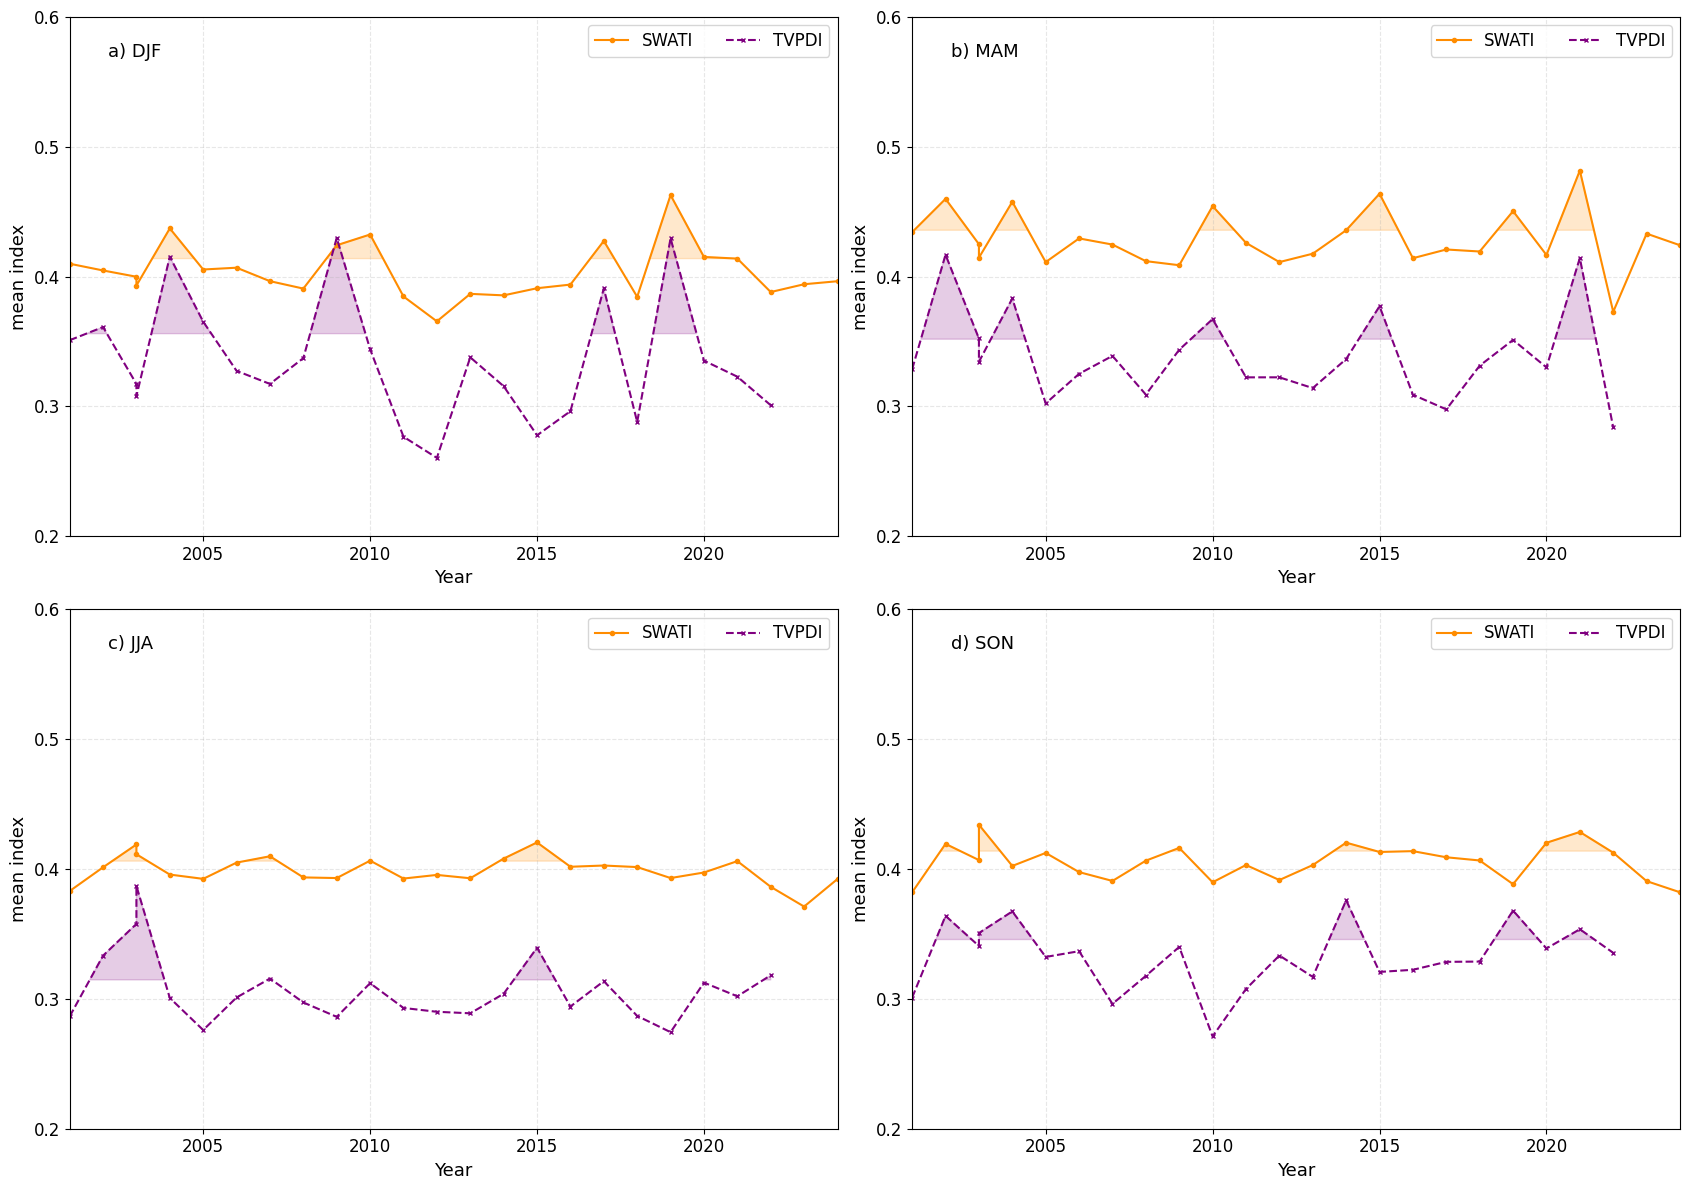

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Define the directory where your file is located
data_directory = '/content/drive/MyDrive/NEW FOLDER/STAT'

# Define the name of the input file
input_file_name = 'Index_mean.csv'
input_file_path = os.path.join(data_directory, input_file_name)

print(f"Attempting to load data from: {input_file_path}")

try:
    # Load the data
    combined_yearly_df = pd.read_csv(input_file_path)
    print("File loaded successfully. DataFrame head:")
    print(combined_yearly_df.head())

    # Clean up column names
    combined_yearly_df.columns = combined_yearly_df.columns.str.strip()

    # Ensure the 'year' column exists
    if 'year' not in combined_yearly_df.columns:
        print("Error: 'year' column not found in the DataFrame. Please check your file's headers.")
        exit()

except FileNotFoundError:
    print(f"Error: Input file not found at {input_file_path}.")
    print("Please ensure your data file exists in the specified directory and its name is correct.")
    exit()
except Exception as e:
    print(f"An error occurred while loading the file: {e}")
    print("Please check the file's delimiter and column headers for consistency and correctness.")
    exit()

# --- PLOTTING CODE ---
print("\nGenerating plots for SWATI and TVPDI by season...")

# Define season labels and their corresponding numerical suffixes
season_info = {
    '01': 'DJF',
    '02': 'MAM',
    '03': 'JJA',
    '04': 'SON'
}

# Define prefixes for subplot labels
subplot_prefixes = ['a)', 'b)', 'c)', 'd)']

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(17, 12))
axes = axes.flatten()

# Define y-axis limits and interval
y1_min = 0.2
y1_max = 0.6
y1_interval = 0.1
y1_ticks = np.arange(y1_min, y1_max + y1_interval, y1_interval)

# Iterate through each season to create a subplot
for i, (season_num, season_label_short) in enumerate(season_info.items()):
    ax1 = axes[i]

    # Define plotting information for Y-axis
    y_axis_plot_info = {
        'swati': {
            'col_name': f'swati_{season_num}_mean',
            'label': 'SWATI',
            'color': 'darkorange',
            'marker': 'o',
            'linestyle': '-'
        },
        'tvpdic': {
            'col_name': f'tvpdic_{season_num}_mean',
            'label': 'TVPDI',
            'color': 'purple',
            'marker': 'x',
            'linestyle': '--'
        }
    }

    # Convert 'year' column to numeric
    combined_yearly_df['year'] = pd.to_numeric(combined_yearly_df['year'], errors='coerce')

    # Get season-specific data
    season_cols = [y_axis_plot_info['swati']['col_name'], y_axis_plot_info['tvpdic']['col_name']]
    season_data = combined_yearly_df[season_cols].copy()
    season_data = season_data.apply(pd.to_numeric, errors='coerce')

    # Calculate thresholds (75th percentile)
    swati_thresh = season_data[season_cols[0]].quantile(0.75)
    tvpdic_thresh = season_data[season_cols[1]].quantile(0.75)

    # Plotting on Y-axis
    for var_name, info in y_axis_plot_info.items():
        col_to_plot = info['col_name']

        if col_to_plot in combined_yearly_df.columns:
            combined_yearly_df[col_to_plot] = pd.to_numeric(combined_yearly_df[col_to_plot], errors='coerce')
            # Plot data points
            ax1.plot(combined_yearly_df['year'], combined_yearly_df[col_to_plot],
                     label=info['label'], color=info['color'],
                     marker=info['marker'], markersize=3, linestyle=info['linestyle'])

            # Add shaded region for values above threshold
            threshold = swati_thresh if var_name == 'swati' else tvpdic_thresh
            ax1.fill_between(combined_yearly_df['year'],
                            combined_yearly_df[col_to_plot],
                            threshold,
                            where=(combined_yearly_df[col_to_plot] >= threshold),
                            color=info['color'], alpha=0.2, interpolate=True)

        else:
            print(f"Warning: Column for {var_name} ({col_to_plot}) not found in DataFrame. Skipping for {season_label_short}.")

    # Set labels and ticks for the y-axis
    ax1.set_ylabel('mean index', fontsize=13, color='black')
    ax1.set_ylim(y1_min, y1_max)
    ax1.set_yticks(y1_ticks)
    ax1.tick_params(axis='y', labelcolor='black', labelsize=12)

    # Common settings for the axis
    ax1.set_xlabel('Year', fontsize=13)
    ax1.tick_params(axis='x', which='major', labelsize=12)
    ax1.set_xlim(2001, 2024)
    ax1.grid(True, linestyle='--', alpha=0.3)

    # Add the season label
    full_season_label = f"{subplot_prefixes[i]} {season_label_short}"
    ax1.text(0.05, 0.95, full_season_label, transform=ax1.transAxes, fontsize=13,
             verticalalignment='top', horizontalalignment='left')

    # Add legend (only for SWATI and TVPDI)
    ax1.legend(loc='upper right', bbox_to_anchor=(1, 1),
               ncol=len(y_axis_plot_info), frameon=True, fontsize=12)

# Adjust layout
plt.tight_layout()

# Define the output file path
output_plot_file_name = 'SWATI_TVPDI_Plots_cdd.png'
output_plot_file_path = os.path.join(data_directory, output_plot_file_name)

# Save the plot
try:
    plt.savefig(output_plot_file_path, dpi=300, bbox_inches='tight')
    print(f"\nPlot saved successfully to: {output_plot_file_path}")
    print(f"The plot is saved with high resolution (300 dpi).")
except Exception as e:
    print(f"An error occurred while saving the plot: {e}")

plt.show()

# Plot with shade options

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Define the directory where your file is located
data_directory = '/content/drive/MyDrive/NEW FOLDER/STAT'

# Define the name of the input file
input_file_name = 'Index_mean.csv'
input_file_path = os.path.join(data_directory, input_file_name)

print(f"Attempting to load data from: {input_file_path}")

try:
    # Load the data
    combined_yearly_df = pd.read_csv(input_file_path)
    print("File loaded successfully. DataFrame head:")
    print(combined_yearly_df.head())

    # Clean up column names
    combined_yearly_df.columns = combined_yearly_df.columns.str.strip()

    # Ensure the 'year' column exists
    if 'year' not in combined_yearly_df.columns:
        print("Error: 'year' column not found in the DataFrame. Please check your file's headers.")
        exit()

except FileNotFoundError:
    print(f"Error: Input file not found at {input_file_path}.")
    print("Please ensure your data file exists in the specified directory and its name is correct.")
    exit()
except Exception as e:
    print(f"An error occurred while loading the file: {e}")
    print("Please check the file's delimiter and column headers for consistency and correctness.")
    exit()

# Convert 'year' column to numeric
combined_yearly_df['year'] = pd.to_numeric(combined_yearly_df['year'], errors='coerce')

# Define seasons, labels, and shaded regions
seasons = [
    {
        'code': '01',
        'label': 'DJF',
        'shade': [
            (2002 - 0.5, 2002 + 0.5),
            (2009 - 0.5, 2009 + 0.5),
            (2017 - 0.5, 2017 + 0.5),
            (2019 - 0.5, 2019 + 0.5)
        ]
    },
    {
        'code': '02',
        'label': 'MAM',
        'shade': [
            (2002 - 0.5, 2002 + 0.5),
            (2004 - 0.5, 2004 + 0.5),
            (2010 - 0.5, 2010 + 0.5),
            (2015 - 0.5, 2015 + 0.5),
            (2021 - 0.5, 2021 + 0.5)
        ]
    },
    {
        'code': '03',
        'label': 'JJA',
        'shade': [
            (2002 - 0.5, 2002 + 0.5),
            (2009 - 0.5, 2009 + 0.5),
            (2013 - 0.5, 2013 + 0.5),
            (2017 - 0.5, 2017 + 0.5),
            (2021 - 0.5, 2021 + 0.5)
        ]
    },
    {
        'code': '04',
        'label': 'SON',
        'shade': [
            (2002 - 0.5, 2002 + 0.5),
            (2009 - 0.5, 2009 + 0.5),
            (2014 - 0.5, 2014 + 0.5),
            (2018 - 0.5, 2018 + 0.5),
            (2021 - 0.5, 2021 + 0.5)
        ]
    }
]

# Create a 2x2 subplot grid with shared axes
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey='row')
axes = axes.flatten()  # Flatten to easily iterate over subplots

# Define y-axis limits and intervals for SWATI and TVPDI (left y-axis)
y1_min = 0.2
y1_max = 0.7
y1_interval = 0.1
y1_ticks = np.arange(y1_min, y1_max + y1_interval, y1_interval)

# Define y-axis limits and intervals for Precipitation (right y-axis)
y2_min = 270
y2_max = 295
y2_interval = 3
y2_ticks = np.arange(y2_min, y2_max + y2_interval, y2_interval)

print("\nGenerating 2x2 plot for SWATI, TVPDI (lines), and Precipitation (bar) for all seasons...")

# Plot each season in its subplot
for idx, season in enumerate(seasons):
    season_code = season['code']
    season_label = season['label']
    shade_regions = season['shade']
    ax1 = axes[idx]
    ax2 = ax1.twinx()  # Create secondary y-axis for precipitation

    # Define plotting information for SWATI, TVPDI, and Precipitation
    plot_info = {
        'swati': {
            'col_name': f'swati_{season_code}_mean',
            'label': 'SWATI',
            'color': 'darkorange',
            'marker': 'o',
            'linestyle': '-',
            'ax': ax1
        },
        'tvpdi': {
            'col_name': f'tvpdi_{season_code}_mean',
            'label': 'TVPDI',
            'color': 'blue',
            'marker': '^',
            'linestyle': '--',
            'ax': ax1
        },
        'prep': {
            'col_name': f'prep_{season_code}_mean',
            'label': 'Precipitation',
            'color': 'green',
            'width': 0.3,
            'ax': ax2
        }
    }

    # Plotting SWATI, TVPDI as lines and Precipitation as bars
    all_columns_present = True
    for key, info in plot_info.items():
        col_to_plot = info['col_name']
        if col_to_plot in combined_yearly_df.columns:
            combined_yearly_df[col_to_plot] = pd.to_numeric(combined_yearly_df[col_to_plot], errors='coerce')
            if key in ['swati', 'tvpdi']:
                info['ax'].plot(combined_yearly_df['year'], combined_yearly_df[col_to_plot],
                                label=info['label'], color=info['color'],
                                marker=info['marker'], markersize=3, linestyle=info['linestyle'])
            else:  # prep
                info['ax'].bar(combined_yearly_df['year'], combined_yearly_df[col_to_plot],
                               width=info['width'], label=info['label'], color=info['color'])
        else:
            print(f"Warning: Column for {key} ({col_to_plot}) not found in DataFrame. Skipping for {season_label}.")
            all_columns_present = False
            break

    if not all_columns_present:
        ax1.remove()  # Remove the subplot if data is missing
        continue

    # Add vertical shaded regions
    for start_year, end_year in shade_regions:
        ax1.fill_betweenx([y1_min, y1_max],
                          start_year, end_year,
                          color='yellow', alpha=0.1)

    # Set labels and ticks for the left y-axis (SWATI and TVPDI)
    if idx % 2 == 0:  # Left column (0, 2)
        ax1.set_ylabel('SWATI / TVPDI', fontsize=10, color='black')
    ax1.set_ylim(y1_min, y1_max)
    ax1.set_yticks(y1_ticks)
    ax1.tick_params(axis='y', labelcolor='black', labelsize=8)

    # Set labels and ticks for the right y-axis (Precipitation)
    if idx % 2 == 1:  # Right column (1, 3)
        ax2.set_ylabel('Precipitation (mm)', fontsize=10, color='black')
    ax2.set_ylim(y2_min, y2_max)
    ax2.set_yticks(y2_ticks)
    ax2.tick_params(axis='y', labelcolor='black', labelsize=8)

    # Set x-axis settings
    if idx >= 2:  # Bottom row (2, 3)
        ax1.set_xlabel('Year', fontsize=10)
    ax1.tick_params(axis='x', which='major', labelsize=8)
    ax1.set_xlim(2001, 2024)
    ax1.set_xticks(np.arange(2001, 2025, 3))
    ax1.grid(True, linestyle='--', alpha=0.3)

    # Add season label
    ax1.text(0.05, 0.95, f'({season_label})', transform=ax1.transAxes, fontsize=10,
             verticalalignment='top', horizontalalignment='left')

# Create a single legend for the entire figure
lines1, labels1 = axes[0].get_legend_handles_labels()
lines2, labels2 = axes[0].twinx().get_legend_handles_labels()
fig.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, 0.98),
           ncol=3, frameon=True, fontsize=9)

# Adjust layout to prevent overlap
plt.tight_layout()
fig.subplots_adjust(top=0.92)  # Make space for the legend

# Define the output file path
output_plot_file_name = 'All_Seasons_SWATI_TVPDI_Prep_Plot_2x2.png'
output_plot_file_path = os.path.join(data_directory, output_plot_file_name)

# Save the plot
try:
    # plt.savefig(output_plot_file_path, dpi=300, bbox_inches='tight')
    print(f"\nPlot saved successfully to: {output_plot_file_path}")
    print(f"The plot is saved with high resolution (300 dpi).")
except Exception as e:
    print(f"An error occurred while saving the plot: {e}")

plt.show()

# Plot with shade option2

Attempting to load data from: /content/drive/MyDrive/NEW FOLDER/STAT/Index_mean.csv
File loaded successfully. DataFrame head:
   year  swati_01_mean  tvpdic_01_mean  tvpdi_01_mean  cdd_01_mean  \
0  2001       0.409925        0.350988       0.588871    23.984608   
1  2002       0.404733        0.361125       0.611097    34.120232   
2  2003       0.399902        0.317309       0.605921    21.393039   
3  2003       0.393111        0.307907       0.579864    15.672561   
4  2004       0.437136        0.415343       0.618496    41.042515   

   prep_01_mean  swati_02_mean  tvpdic_02_mean  tvpdi_02_mean  cdd_02_mean  \
0    275.628542       0.434227        0.328698       0.475787    15.539673   
1    274.400038       0.459893        0.416836       0.615933    33.771334   
2    274.375669       0.424979        0.352325       0.600886    19.840294   
3    276.428889       0.414590        0.334352       0.557539    12.095066   
4    274.541391       0.457638        0.383151       0.589154  

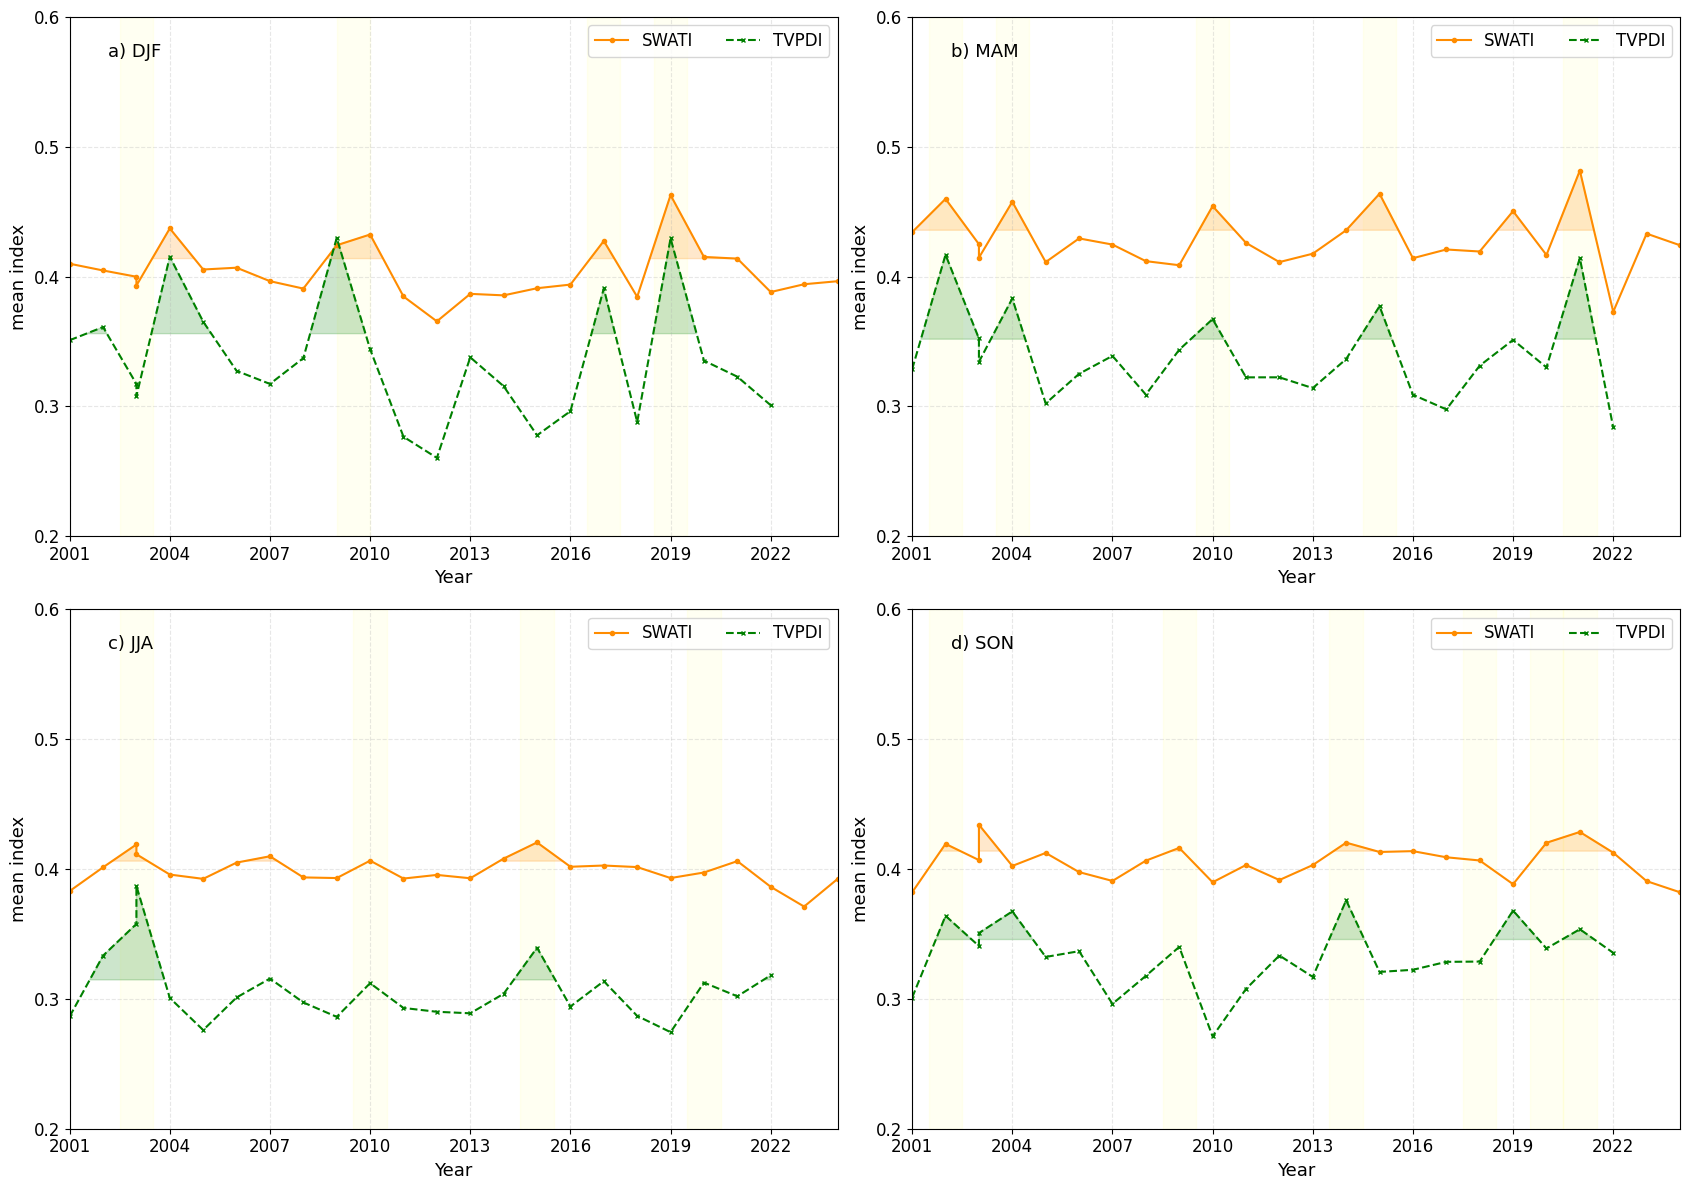

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Define the directory where your file is located
data_directory = '/content/drive/MyDrive/NEW FOLDER/STAT'

# Define the name of the input file
input_file_name = 'Index_mean.csv'
input_file_path = os.path.join(data_directory, input_file_name)

print(f"Attempting to load data from: {input_file_path}")

try:
    # Load the data
    combined_yearly_df = pd.read_csv(input_file_path)
    print("File loaded successfully. DataFrame head:")
    print(combined_yearly_df.head())

    # Clean up column names
    combined_yearly_df.columns = combined_yearly_df.columns.str.strip()

    # Ensure the 'year' column exists
    if 'year' not in combined_yearly_df.columns:
        print("Error: 'year' column not found in the DataFrame. Please check your file's headers.")
        exit()

except FileNotFoundError:
    print(f"Error: Input file not found at {input_file_path}.")
    print("Please ensure your data file exists in the specified directory and its name is correct.")
    exit()
except Exception as e:
    print(f"An error occurred while loading the file: {e}")
    print("Please check the file's delimiter and column headers for consistency and correctness.")
    exit()

# --- PLOTTING CODE ---
print("\nGenerating plots for SWATI and TVPDI by season...")

# Define season labels and their corresponding numerical suffixes
season_info = {
    '01': 'DJF',
    '02': 'MAM',
    '03': 'JJA',
    '04': 'SON'
}

# Define seasons with shade regions
seasons = [
    {
        'code': '01',
        'label': 'DJF',
        'shade': [
            (2004 - 0.5, 2002 + 0.5),
            (2009 , 2010 ),
            (2017 - 0.5, 2017 + 0.5),
            (2019 - 0.5, 2019 + 0.5)
        ]
    },
    {
        'code': '02',
        'label': 'MAM',
        'shade': [
            (2002 - 0.5, 2002 + 0.5),
            (2004 - 0.5, 2004 + 0.5),
            (2010 - 0.5, 2010 + 0.5),
            (2015 - 0.5, 2015 + 0.5),
            (2021 - 0.5, 2021 + 0.5)
        ]
    },
    {
        'code': '03',
        'label': 'JJA',
        'shade': [
            (2003 - 0.5, 2003 + 0.5),
            (2010 - 0.5, 2010 + 0.5),
            (2015 - 0.5, 2015 + 0.5),
            (2020 - 0.5, 2020 + 0.5),
            # (2021 - 0.5, 2021 + 0.5)
        ]
    },
    {
        'code': '04',
        'label': 'SON',
        'shade': [
            (2002 - 0.5, 2002 + 0.5),
            (2009 - 0.5, 2009 + 0.5),
            (2014 - 0.5, 2014 + 0.5),
            (2018 - 0.5, 2018 + 0.5),
            (2020 - 0.5, 2020 + 0.5),
            (2021 - 0.5, 2021 + 0.5)
        ]
    }
]

# Define prefixes for subplot labels
subplot_prefixes = ['a)', 'b)', 'c)', 'd)']

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(17, 12))
axes = axes.flatten()

# Define y-axis limits and interval
y1_min = 0.2
y1_max = 0.6
y1_interval = 0.1
y1_ticks = np.arange(y1_min, y1_max + y1_interval, y1_interval)

# Iterate through each season to create a subplot
for i, season in enumerate(seasons):
    season_num = season['code']
    season_label_short = season['label']
    shade_regions = season['shade']
    ax1 = axes[i]

    # Define plotting information for Y-axis
    y_axis_plot_info = {
        'swati': {
            'col_name': f'swati_{season_num}_mean',
            'label': 'SWATI',
            'color': 'darkorange',
            'marker': 'o',
            'linestyle': '-'
        },
        'tvpdic': {
            'col_name': f'tvpdic_{season_num}_mean',
            'label': 'TVPDI',
            'color': 'green',
            'marker': 'x',
            'linestyle': '--'
        }
    }

    # Convert 'year' column to numeric
    combined_yearly_df['year'] = pd.to_numeric(combined_yearly_df['year'], errors='coerce')

    # Get season-specific data
    season_cols = [y_axis_plot_info['swati']['col_name'], y_axis_plot_info['tvpdic']['col_name']]
    season_data = combined_yearly_df[season_cols].copy()
    season_data = season_data.apply(pd.to_numeric, errors='coerce')

    # Calculate thresholds (75th percentile)
    swati_thresh = season_data[season_cols[0]].quantile(0.75)
    tvpdic_thresh = season_data[season_cols[1]].quantile(0.75)

    # Add shaded regions for specified years
    for (start, end) in shade_regions:
        ax1.axvspan(start, end, alpha=0.05, color='yellow')

    # Plotting on Y-axis
    for var_name, info in y_axis_plot_info.items():
        col_to_plot = info['col_name']

        if col_to_plot in combined_yearly_df.columns:
            combined_yearly_df[col_to_plot] = pd.to_numeric(combined_yearly_df[col_to_plot], errors='coerce')
            # Plot data points
            ax1.plot(combined_yearly_df['year'], combined_yearly_df[col_to_plot],
                     label=info['label'], color=info['color'],
                     marker=info['marker'], markersize=3, linestyle=info['linestyle'])

            # Add shaded region for values above threshold
            threshold = swati_thresh if var_name == 'swati' else tvpdic_thresh
            ax1.fill_between(combined_yearly_df['year'],
                            combined_yearly_df[col_to_plot],
                            threshold,
                            where=(combined_yearly_df[col_to_plot] >= threshold),
                            color=info['color'], alpha=0.2, interpolate=True)

        else:
            print(f"Warning: Column for {var_name} ({col_to_plot}) not found in DataFrame. Skipping for {season_label_short}.")

    # Set labels and ticks for the y-axis
    ax1.set_ylabel('mean index', fontsize=13, color='black')
    ax1.set_ylim(y1_min, y1_max)
    ax1.set_yticks(y1_ticks)
    ax1.tick_params(axis='y', labelcolor='black', labelsize=12)

    # Common settings for the axis
    ax1.set_xlabel('Year', fontsize=13)
    ax1.tick_params(axis='x', which='major', labelsize=12)
    ax1.set_xlim(2001, 2024)
    ax1.set_xticks(np.arange(2001, 2025, 3))  # 3-year interval
    ax1.grid(True, linestyle='--', alpha=0.3)
    # Common settings for the x-axis

    # Add the season label
    full_season_label = f"{subplot_prefixes[i]} {season_label_short}"
    ax1.text(0.05, 0.95, full_season_label, transform=ax1.transAxes, fontsize=13,
             verticalalignment='top', horizontalalignment='left')

    # Add legend (only for SWATI and TVPDI)
    ax1.legend(loc='upper right', bbox_to_anchor=(1, 1),
               ncol=len(y_axis_plot_info), frameon=True, fontsize=12)

# Adjust layout
plt.tight_layout()

# Define the output file path
output_plot_file_name = 'SWATI_TVPDI_Plots_with_Shading.png'
output_plot_file_path = os.path.join(data_directory, output_plot_file_name)

# Save the plot
try:
    # plt.savefig(output_plot_file_path, dpi=300, bbox_inches='tight')
    print(f"\nPlot saved successfully to: {output_plot_file_path}")
    print(f"The plot is saved with high resolution (300 dpi).")
except Exception as e:
    print(f"An error occurred while saving the plot: {e}")

plt.show()

# SWATI_TVPDI_with_Trends

Attempting to load data from: /content/drive/MyDrive/NEW FOLDER/STAT/Index_mean.csv
File loaded successfully. DataFrame head:
   year  swati_01_mean  tvpdic_01_mean  tvpdi_01_mean  cdd_01_mean  \
0  2001       0.409925        0.350988       0.588871    23.984608   
1  2002       0.404733        0.361125       0.611097    34.120232   
2  2003       0.399902        0.317309       0.605921    21.393039   
3  2003       0.393111        0.307907       0.579864    15.672561   
4  2004       0.437136        0.415343       0.618496    41.042515   

   prep_01_mean  swati_02_mean  tvpdic_02_mean  tvpdi_02_mean  cdd_02_mean  \
0    275.628542       0.434227        0.328698       0.475787    15.539673   
1    274.400038       0.459893        0.416836       0.615933    33.771334   
2    274.375669       0.424979        0.352325       0.600886    19.840294   
3    276.428889       0.414590        0.334352       0.557539    12.095066   
4    274.541391       0.457638        0.383151       0.589154  

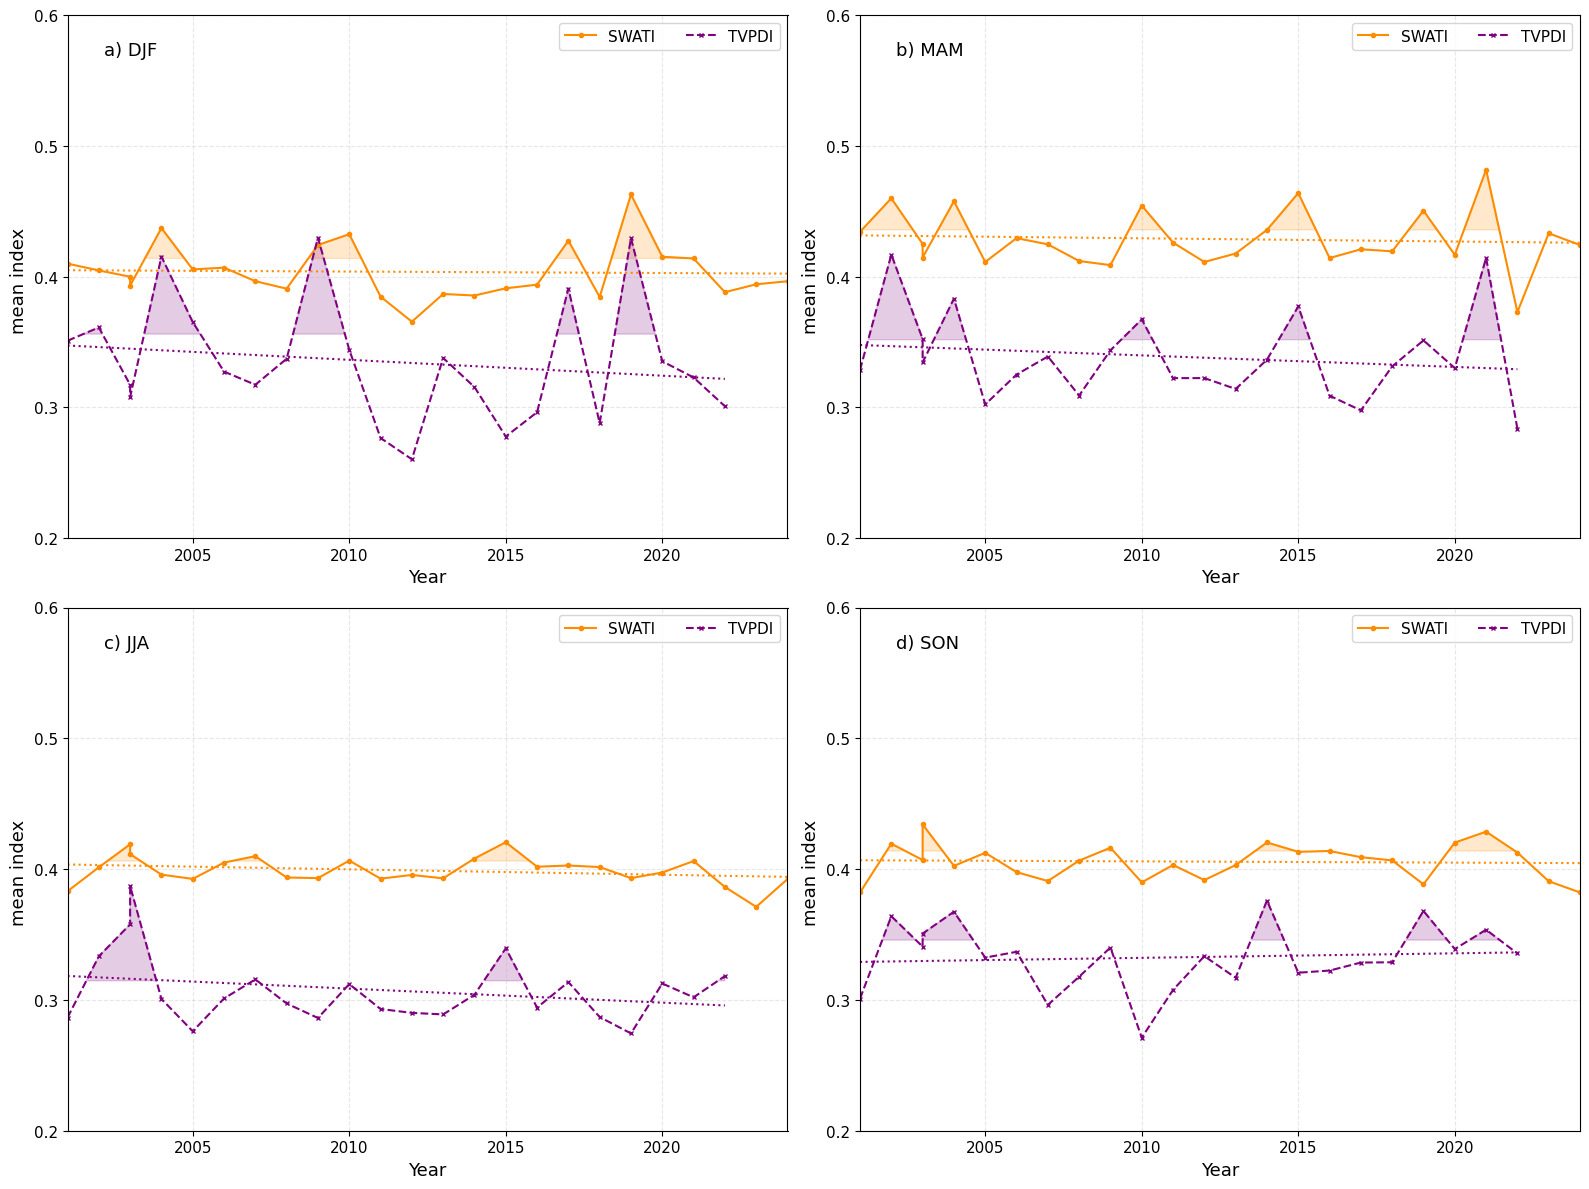

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Define the directory where your file is located
data_directory = '/content/drive/MyDrive/NEW FOLDER/STAT'

# Define the name of the input file
input_file_name = 'Index_mean.csv'
input_file_path = os.path.join(data_directory, input_file_name)

print(f"Attempting to load data from: {input_file_path}")

try:
    # Load the data
    combined_yearly_df = pd.read_csv(input_file_path)
    print("File loaded successfully. DataFrame head:")
    print(combined_yearly_df.head())

    # Clean up column names
    combined_yearly_df.columns = combined_yearly_df.columns.str.strip()

    # Ensure the 'year' column exists
    if 'year' not in combined_yearly_df.columns:
        print("Error: 'year' column not found in the DataFrame. Please check your file's headers.")
        exit()

except FileNotFoundError:
    print(f"Error: Input file not found at {input_file_path}.")
    print("Please ensure your data file exists in the specified directory and its name is correct.")
    exit()
except Exception as e:
    print(f"An error occurred while loading the file: {e}")
    print("Please check the file's delimiter and column headers for consistency and correctness.")
    exit()

# --- PLOTTING CODE ---
print("\nGenerating plots for SWATI and TVPDI by season...")

# Define season labels and their corresponding numerical suffixes
season_info = {
    '01': 'DJF',
    '02': 'MAM',
    '03': 'JJA',
    '04': 'SON'
}

# Define prefixes for subplot labels
subplot_prefixes = ['a)', 'b)', 'c)', 'd)']

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Define y-axis limits and interval
y1_min = 0.2
y1_max = 0.6
y1_interval = 0.1
y1_ticks = np.arange(y1_min, y1_max + y1_interval, y1_interval)

# Iterate through each season to create a subplot
for i, (season_num, season_label_short) in enumerate(season_info.items()):
    ax1 = axes[i]

    # Define plotting information for Y-axis
    y_axis_plot_info = {
        'swati': {
            'col_name': f'swati_{season_num}_mean',
            'label': 'SWATI',
            'color': 'darkorange',
            'marker': 'o',
            'linestyle': '-'
        },
        'tvpdic': {
            'col_name': f'tvpdic_{season_num}_mean',
            'label': 'TVPDI',
            'color': 'purple',
            'marker': 'x',
            'linestyle': '--'
        }
    }

    # Convert 'year' column to numeric
    combined_yearly_df['year'] = pd.to_numeric(combined_yearly_df['year'], errors='coerce')

    # Get season-specific data
    season_cols = [y_axis_plot_info['swati']['col_name'], y_axis_plot_info['tvpdic']['col_name']]
    season_data = combined_yearly_df[season_cols].copy()
    season_data = season_data.apply(pd.to_numeric, errors='coerce')

    # Calculate thresholds (75th percentile)
    swati_thresh = season_data[season_cols[0]].quantile(0.75)
    tvpdic_thresh = season_data[season_cols[1]].quantile(0.75)

    # Plotting on Y-axis
    for var_name, info in y_axis_plot_info.items():
        col_to_plot = info['col_name']

        if col_to_plot in combined_yearly_df.columns:
            combined_yearly_df[col_to_plot] = pd.to_numeric(combined_yearly_df[col_to_plot], errors='coerce')
            # Plot data points
            ax1.plot(combined_yearly_df['year'], combined_yearly_df[col_to_plot],
                     label=info['label'], color=info['color'],
                     marker=info['marker'], markersize=3, linestyle=info['linestyle'])

            # Add shaded region for values above threshold
            threshold = swati_thresh if var_name == 'swati' else tvpdic_thresh
            ax1.fill_between(combined_yearly_df['year'],
                            combined_yearly_df[col_to_plot],
                            threshold,
                            where=(combined_yearly_df[col_to_plot] >= threshold),
                            color=info['color'], alpha=0.2, interpolate=True)

            # Calculate and plot trend line without label
            mask = ~combined_yearly_df[col_to_plot].isna() & ~combined_yearly_df['year'].isna()
            x = combined_yearly_df['year'][mask]
            y = combined_yearly_df[col_to_plot][mask]

            if len(x) > 1:  # Ensure there's enough data for a trend line
                z = np.polyfit(x, y, 1)  # Linear fit
                p = np.poly1d(z)
                ax1.plot(x, p(x), color=info['color'], linestyle=':')  # No label for trend line

        else:
            print(f"Warning: Column for {var_name} ({col_to_plot}) not found in DataFrame. Skipping for {season_label_short}.")

    # Set labels and ticks for the y-axis
    ax1.set_ylabel('mean index ', fontsize=13, color='black')
    ax1.set_ylim(y1_min, y1_max)
    ax1.set_yticks(y1_ticks)
    ax1.tick_params(axis='y', labelcolor='black', labelsize=11)

    # Common settings for the axis
    ax1.set_xlabel('Year', fontsize=13)
    ax1.tick_params(axis='x', which='major', labelsize=11)
    ax1.set_xlim(2001, 2024)
    ax1.grid(True, linestyle='--', alpha=0.3)

    # Add the season label
    full_season_label = f"{subplot_prefixes[i]} {season_label_short}"
    ax1.text(0.05, 0.95, full_season_label, transform=ax1.transAxes, fontsize=13,
             verticalalignment='top', horizontalalignment='left')

    # Add legend (only for SWATI and TVPDI)
    ax1.legend(loc='upper right', bbox_to_anchor=(1, 1),
               ncol=len(y_axis_plot_info), frameon=True, fontsize=11)

# Adjust layout
plt.tight_layout()

# Define the output file path
output_plot_file_name = 'SWATI_TVPDI_with_Trends.png'
output_plot_file_path = os.path.join(data_directory, output_plot_file_name)

# Save the plot
try:
    plt.savefig(output_plot_file_path, dpi=300, bbox_inches='tight')
    print(f"\nPlot saved successfully to: {output_plot_file_path}")
    print(f"The plot is saved with high resolution (300 dpi).")
except Exception as e:
    print(f"An error occurred while saving the plot: {e}")

plt.show()

# MAM_SWATI_Prep_Plot

Attempting to load data from: /content/drive/MyDrive/NEW FOLDER/STAT/Index_mean.csv
File loaded successfully. DataFrame head:
   year  swati_01_mean  tvpdic_01_mean  tvpdi_01_mean  cdd_01_mean  \
0  2001       0.409925        0.350988       0.588871    23.984608   
1  2002       0.404733        0.361125       0.611097    34.120232   
2  2003       0.399902        0.317309       0.605921    21.393039   
3  2003       0.393111        0.307907       0.579864    15.672561   
4  2004       0.437136        0.415343       0.618496    41.042515   

   prep_01_mean  swati_02_mean  tvpdic_02_mean  tvpdi_02_mean  cdd_02_mean  \
0    275.628542       0.434227        0.328698       0.475787    15.539673   
1    274.400038       0.459893        0.416836       0.615933    33.771334   
2    274.375669       0.424979        0.352325       0.600886    19.840294   
3    276.428889       0.414590        0.334352       0.557539    12.095066   
4    274.541391       0.457638        0.383151       0.589154  

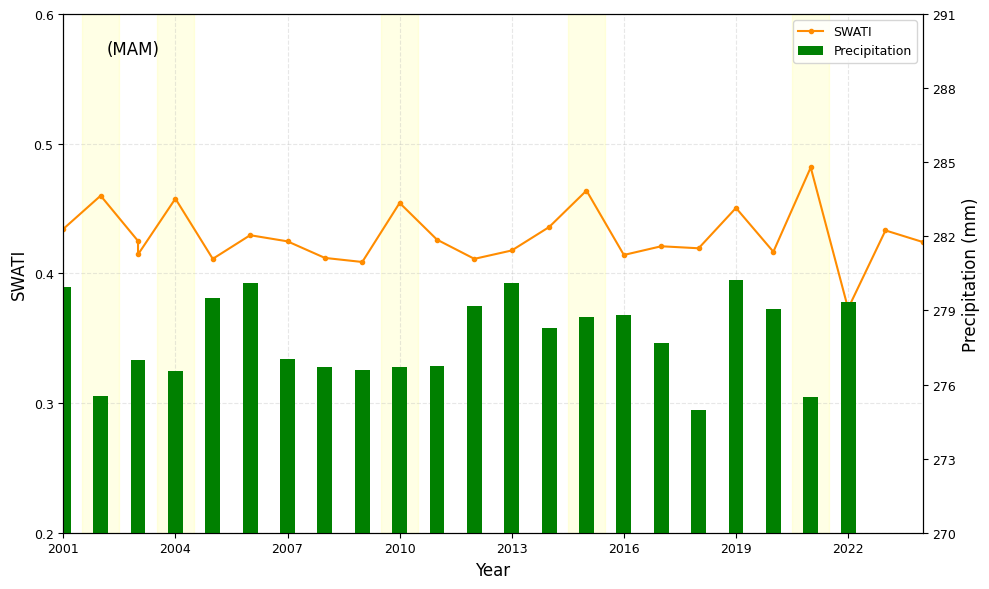

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Define the directory where your file is located
data_directory = '/content/drive/MyDrive/NEW FOLDER/STAT'

# Define the name of the input file
input_file_name = 'Index_mean.csv'
input_file_path = os.path.join(data_directory, input_file_name)

print(f"Attempting to load data from: {input_file_path}")

try:
    # Load the data
    combined_yearly_df = pd.read_csv(input_file_path)
    print("File loaded successfully. DataFrame head:")
    print(combined_yearly_df.head())

    # Clean up column names
    combined_yearly_df.columns = combined_yearly_df.columns.str.strip()

    # Ensure the 'year' column exists
    if 'year' not in combined_yearly_df.columns:
        print("Error: 'year' column not found in the DataFrame. Please check your file's headers.")
        exit()

except FileNotFoundError:
    print(f"Error: Input file not found at {input_file_path}.")
    print("Please ensure your data file exists in the specified directory and its name is correct.")
    exit()
except Exception as e:
    print(f"An error occurred while loading the file: {e}")
    print("Please check the file's delimiter and column headers for consistency and correctness.")
    exit()

# --- PLOTTING CODE ---
print("\nGenerating plot for SWATI (line) and Precipitation (bar) for MAM season...")

# Create a single plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create secondary y-axis for precipitation
ax2 = ax1.twinx()

# Define y-axis limits and interval for SWATI (left y-axis)
y1_min = 0.2
y1_max = 0.6
y1_interval = 0.1
y1_ticks = np.arange(y1_min, y1_max + y1_interval, y1_interval)

# Define y-axis limits and interval for Precipitation (right y-axis)
y2_min = 270
y2_max = 290  # Adjust based on your precipitation data range
y2_interval = 3
y2_ticks = np.arange(y2_min, y2_max + y2_interval, y2_interval)

# Define plotting information for SWATI and Precipitation
plot_info = {
    'swati': {
        'col_name': 'swati_02_mean',
        'label': 'SWATI',
        'color': 'darkorange',
        'marker': 'o',
        'linestyle': '-',
        'ax': ax1
    },
    'prep': {
        'col_name': 'prep_02_mean',
        'label': 'Precipitation',
        'color': 'green',
        'width': 0.4,  # Width for precipitation bars
        'ax': ax2
    }
}

# Convert 'year' column to numeric
combined_yearly_df['year'] = pd.to_numeric(combined_yearly_df['year'], errors='coerce')

# Plotting SWATI as line and Precipitation as bars
for key, info in plot_info.items():
    col_to_plot = info['col_name']
    if col_to_plot in combined_yearly_df.columns:
        combined_yearly_df[col_to_plot] = pd.to_numeric(combined_yearly_df[col_to_plot], errors='coerce')
        if key == 'swati':
            # Plot SWATI as line with markers
            info['ax'].plot(combined_yearly_df['year'], combined_yearly_df[col_to_plot],
                            label=info['label'], color=info['color'],
                            marker=info['marker'], markersize=3, linestyle=info['linestyle'])
        else:  # prep
            # Plot Precipitation as bars
            info['ax'].bar(combined_yearly_df['year'], combined_yearly_df[col_to_plot],
                           width=info['width'], label=info['label'], color=info['color'])
    else:
        print(f"Warning: Column for {key} ({col_to_plot}) not found in DataFrame. Skipping for MAM.")
        exit()

# Define shaded regions
shade_regions = [
    # (2002, 2003),  # First region: 2002 to 2003
    (2002 - 0.5, 2002 + 0.5),  # Second region: centered around 2004
    # (2004 - 0.5, 2004 + 0.5),  # Second region: centered around 2004
    (2004 - 0.5, 2004 + 0.5),  # Second region: centered around 2004
    (2010 - 0.5, 2010 + 0.5),  # Third region: centered around 2010
    (2015 - 0.5, 2015 + 0.5),  # Fourth region: centered around 2015
    (2021 - 0.5, 2021 + 0.5)   # Fifth region: centered around 2021
]

# Add vertical shaded regions with yellow color and reduced transparency
for start_year, end_year in shade_regions:
    ax1.fill_betweenx([y1_min, y1_max],
                      start_year, end_year,
                      color='yellow', alpha=0.1)

# Set labels and ticks for the left y-axis (SWATI)
ax1.set_ylabel('SWATI', fontsize=12, color='black')
ax1.set_ylim(y1_min, y1_max)
ax1.set_yticks(y1_ticks)
ax1.tick_params(axis='y', labelcolor='black', labelsize=9)

# Set labels and ticks for the right y-axis (Precipitation)
ax2.set_ylabel('Precipitation (mm)', fontsize=12, color='black')
ax2.set_ylim(y2_min, y2_max)
ax2.set_yticks(y2_ticks)
ax2.tick_params(axis='y', labelcolor='black', labelsize=9)

# Common settings for the x-axis
ax1.set_xlabel('Year', fontsize=12)
ax1.tick_params(axis='x', which='major', labelsize=9)
ax1.set_xlim(2001, 2024)
ax1.set_xticks(np.arange(2001, 2025, 3))  # 3-year interval
ax1.grid(True, linestyle='--', alpha=0.3)

# Add the season label
ax1.text(0.05, 0.95, '(MAM)', transform=ax1.transAxes, fontsize=12,
         verticalalignment='top', horizontalalignment='left')

# Add combined legend for both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', bbox_to_anchor=(1, 1),
           ncol=1, frameon=True, fontsize=9)

# Adjust layout
plt.tight_layout()

# Define the output file path
output_plot_file_name = 'MAM_SWATI_Prep_Plot.png'
output_plot_file_path = os.path.join(data_directory, output_plot_file_name)

# Save the plot
try:
    plt.savefig(output_plot_file_path, dpi=300, bbox_inches='tight')
    print(f"\nPlot saved successfully to: {output_plot_file_path}")
    print(f"The plot is saved with high resolution (300 dpi).")
except Exception as e:
    print(f"An error occurred while saving the plot: {e}")

plt.show()